# Sentiment classification

 * How to perform text classification using Scikit-learn, specifically sentiment classification
 * Apply a Naive Bayes and Logistic Regression classifiers
 * How to evaluate a classifier with key metrics including Precision, Recall, F1, and confusion matrix
 * How to use FeatureUnion and Pipelines to incorporate multiple features
 * How to incorporate different types of features (sparse and dense)
 * How to use GridSearchCV to tune parameters



Our dataset this week comes from reviews for Android apps on the Play Store. 


In [46]:
local_file = "reviews_Apps_for_Android_5.json.gz"
#!curl -o  $local_file https://storage.googleapis.com/tad2018/reviews_Apps_for_Android_5.json.gz

We will limit the number of reviews to make it smaller so that the lab is faster to complete. You may remove the limit if you desire.

In [47]:
import gzip
import json
import pandas as pd

review_list = list()

# Construct a dataframe, by opening the JSON file line-by-line
with gzip.open(local_file) as jsonfile:
    for i, line in enumerate(jsonfile):
        review = json.loads(line)
    #print(review)
    #if (i >= review_limit): break
    # asin is the product number, overall is the number of stars awarded by the user for that product
        review_list.append( (review['asin'], review['reviewerID'], review['reviewText'], review['summary'], review['overall']))
                   
print("We have %d reviews in our dataset"  % len(review_list))

collabels = ['productId', 'reviewerID', 'reviewText', 'summary', 'overall']
reviews = pd.DataFrame(review_list, columns=collabels)

We have 752937 reviews in our dataset


Let's explore the data before we jump into classification.

In [48]:
reviews.head(20)

,productId,reviewerID,reviewText,summary,overall
0,B004A9SDD8,A1N4O8VOJZTDVB,"Loves the song, so he really couldn't wait to ...",Really cute,3.0
1,B004A9SDD8,A2HQWU6HUKIEC7,"Oh, how my little grandson loves this app. He'...",2-year-old loves it,5.0
2,B004A9SDD8,A1SXASF6GYG96I,I found this at a perfect time since my daught...,Fun game,5.0
3,B004A9SDD8,A2B54P9ZDYH167,My 1 year old goes back to this game over and ...,We love our Monkeys!,5.0
4,B004A9SDD8,AFOFZDTX5UC6D,There are three different versions of the song...,This is my granddaughters favorite app on my K...,5.0
5,B004A9SDD8,A331GYAT4ESYI3,THis is just so cute and a great app for littl...,so cute,5.0
6,B004A9SDD8,A2YEHF8T823TDC,I watch my great grandson 4 days a week and it...,Terrific!,5.0
7,B004A9SDD8,A3699WHISXX94Z,This app is wild and crazy. Little ones love ...,Five Little Monkeys,5.0
8,B004A9SDD8,A2BXV49EIES2TB,love love love this app. I was going through d...,love but to quite,5.0
9,B004A9SDD8,A37HM5TMCMHJES,"Very cute, with alot of items to move about. ...",Cute,5.0


Create a histogram of the scores ('overall') rating. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000001401A1BC8>]],
      dtype=object)

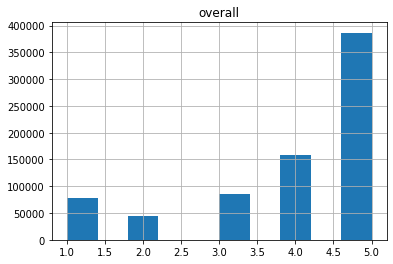

In [49]:
reviews.hist('overall')

It seems that most reviews are positive. For this exercise, we'll be looking at the task of binary classification. We will bin the reviews into two classes for the purposes of binary sentiment classification -- Like vs Not like. 

 


### Create the (class) labels


*  Create a function, create_label that outputs a vector of class labels (Y vector). Reviews with a score strictly greater than *3* should be assigned a positive label (`1`), the label should be, `0` otherwise. 
*   Apply the function to the *overall* column and assign the result to a new data column in the reviews dataframe, `reviews['Class']`



In [50]:
def create_label(label):
    if label >3:
        return 1
    else:
        return 0
reviews['Class']=reviews['overall'].apply(create_label)

print(reviews.head(20))


     productId      reviewerID  \
0   B004A9SDD8  A1N4O8VOJZTDVB   
1   B004A9SDD8  A2HQWU6HUKIEC7   
2   B004A9SDD8  A1SXASF6GYG96I   
3   B004A9SDD8  A2B54P9ZDYH167   
4   B004A9SDD8   AFOFZDTX5UC6D   
5   B004A9SDD8  A331GYAT4ESYI3   
6   B004A9SDD8  A2YEHF8T823TDC   
7   B004A9SDD8  A3699WHISXX94Z   
8   B004A9SDD8  A2BXV49EIES2TB   
9   B004A9SDD8  A37HM5TMCMHJES   
10  B004A9SDD8  A1FYZPJLU78R2Y   
11  B004A9SDD8   AV58L39SOERMI   
12  B004A9SDD8  A31XG60B64OW74   
13  B004A9SDD8  A39JZ61LPIVY91   
14  B004A9SDD8   AIRKROQMCBVG4   
15  B004A9SDD8   AELVL0VXR3VFN   
16  B004A9SDD8   A55641MA1CS5F   
17  B004AFQAUA  A39TLD5D8M76M4   
18  B004AFQAUA  A2XJJKZSEYYW8T   
19  B004AFQAUA   AJ9JRKE8AADW0   

                                           reviewText  \
0   Loves the song, so he really couldn't wait to ...   
1   Oh, how my little grandson loves this app. He'...   
2   I found this at a perfect time since my daught...   
3   My 1 year old goes back to this game over and ...   


In [51]:
#@title
##Solution

# Alternate solution:
#reviews['Class'] = 1 * (reviews['overall'] > 3)

def create_label(x):
    if x > 3:
        return 1 # 'positive' 
    return 0 # 'negative'
  
reviews['Class'] = reviews.overall.apply(create_label)

#### Exercise  
* Print the class prior probabilities, P(c)

In [52]:
def binary_priori(class_column):
    total_docs=len(class_column)
    n_C_1=0
    n_C_0=0
    for each_class in class_column.values:
        if each_class ==0:
            n_C_0+=1
        else:
            n_C_1+=1

    p_C_1=n_C_1/total_docs
    p_C_0=n_C_0/total_docs

    return p_C_1,p_C_0

p_C_1,p_C_0 = binary_priori(reviews['Class'])   
p_C_1

0.723457606678912

You should see that most (~72% of the labels are positive overall in the dataset). This means we have an issue of class imbalance.

### Train/Validation/Test sets

Next, lets split the reviews dataframe in to train, validation, and test sets.  Recall that training data is used to train our model.  Validation data is used to develop our model (develop new features, etc...) and tune parameters.  The final result should be reported on the test data (that we haven't looked at throughout). 

1. Split your data (all instances) into *training* and *testing* (80/20 is a reasonable starting point)
2. Split the **training data** into *training* and *validation* (again, 80/20 is a typical split).

Note that as the size of the dataset increases, the ratio of train/validation/test may vary in other datasets.  For example, if you have millions (or billions) of instances the splits could be more like 99%/0.5%/0.5% for train/validation/test.  This is because you are still using a large number of instances to evaluate the model.

We shuffle the data randomly to avoid potential ordering bias.  Note that because we are all using different random splits of the data every time we run the notebook the results will differ (very) slightly due to differences in the random splits. 

In [53]:
# shuffle the data randomly to avoid possible bias.
random_reviews = reviews.sample(frac=1)

# The min limits the size of the dataset loaded to 100k, 1/8 of the total data. 
# It's set to not be "too big" for this lab. 
review_limit = min(100000, len(random_reviews))
random_reviews = random_reviews.iloc[:review_limit, :]

# 1. Split the data 80/20 train/test
train_split = int(len(random_reviews) * 0.8)
tmp_train = random_reviews.iloc[:train_split,:]
test_data = random_reviews.iloc[train_split:,:]

# 2. Split the train data into a train/validation split that's 80% train, 20% developemnt 
validation_split = int(train_split * 0.8)
train_data = tmp_train.iloc[:validation_split,:]
validation_data = tmp_train.iloc[validation_split:,:]


Lets see some statistics of our resulting datasets.

In [54]:
print('Training set contains {:d} reviews.'.format(len(train_data)))
print('Vadlidation set contains {:d} reviews.'.format(len(validation_data)))
print('Test set contains {:d} reviews.'.format(len(test_data)))

number_positive_train = sum(train_data['Class'] == 1)
number_positive_validation = sum(validation_data['Class'] == 1)
number_positive_test = sum(test_data['Class'] == 1)

print('Training set contains %0.0f%% positive reviews' % (100*number_positive_train/len(train_data)))
print('Validation set contains %0.0f%% positive reviews' % (100*number_positive_validation/len(validation_data)))
print('Test set contains %0.0f%% positive reviews' % (100*number_positive_test/len(test_data)))

Training set contains 64000 reviews.
Vadlidation set contains 16000 reviews.
Test set contains 20000 reviews.
Training set contains 72% positive reviews
Validation set contains 73% positive reviews
Test set contains 73% positive reviews


We can see that the train/dev/test data all have about 72% positive labels.  This is the same percentage as the overall collection. This is a good sanity check to make sure the data is split appropriately.



Now we have our instances with labels.  Now, we need to create a text representation.  We will start by processing the reviews with spaCy to tokenize and normalize the text. 


In [4]:

#!python -m spacy download en

import spacy

import sys
print(sys.version)

# Version checks
import importlib
def version_check(libname, min_version):
    m = importlib.import_module(libname)
    print ("%s version %s is" % (libname, m.__version__))
    print ("OK" if m.__version__ >= min_version 
           else "out-of-date. Please upgrade!")
    
version_check("spacy", "2.0")

# Load the small english model. 
# Disable the advanced NLP features in the pipeline for efficiency.
nlp = spacy.load('en_core_web_sm', disable=['ner'])
print(nlp.pipeline)
print(nlp.pipe_names)
nlp.remove_pipe('tagger')
nlp.remove_pipe('parser')
# Verify they are empty.
print(nlp.pipeline)


'''
nlp = spacy.load('en_core_web_sm', disable=['ner'])
nlp.remove_pipe('tagger')
nlp.remove_pipe('parser')'''

3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
spacy version 2.2.3 is
OK
[('tagger', <spacy.pipeline.pipes.Tagger object at 0x0000008DC586BC48>), ('parser', <spacy.pipeline.pipes.DependencyParser object at 0x0000008DC5853E88>)]
['tagger', 'parser']
[]


"\nnlp = spacy.load('en_core_web_sm', disable=['ner'])\nnlp.remove_pipe('tagger')\nnlp.remove_pipe('parser')"

In [16]:
#@Tokenize
def spacy_tokenize(string):
    tokens = list()
    doc = nlp(string)
    for token in doc:
        tokens.append(token)
    return tokens

#@Normalize
def normalize(tokens):
    normalized_tokens = list()
    for token in tokens:
        normalized = token.text.lower().strip()
        #print(normalized)
        if "_" in token.text:
            normalized_tokens.append(normalized)
        
        
        if ((token.is_alpha or token.is_digit )):
            #if not token.like_url:
            normalized_tokens.append(normalized)
        
    return normalized_tokens
    

#@Tokenize and normalize
def tokenize_normalize(string):
    return normalize(spacy_tokenize(string))

Test to make sure the normalization is working.  Note that for this simple example we aren't keeping punctuation or emoji.  It might be something that could be useful as an option to test later.

In [18]:
tokenize_normalize("the t3_mqxoi http://goo45gle.com app is fun. very happy.")

['the', 't3_mqxoi', 'app', 'is', 'fun', 'very', 'happy']

In [100]:
for t in nlp("t3_mqxoi t1_c334scx t1_c3354ny t1_c3356y6 :D :( :'("):
    print(t)

t3_mqxoi
t1_c334scx
t1_c3354ny
t1_c3356y6
:D
:(
:'(


The result should be [the, app, is, fun, very, happy].

Now we are ready to create the features. As this is for text classification, our features are terms. We'll start with a simple one-hot encoding.

> Indented block



#### Exercise
* Create a vectorizer variable, `one_hot_vectorizer`. Use a `CountVectorizer` initialized with `tokenize_normalize` function for the tokenizer parameter. Also use `binary=True` to create a one-hot encoding, set `max_features=20000` to limit the vocabulary to the most frequent 20k words.
* Fit the vectorizer model on the `train_data`, the `reviewText` column.
* Apply the vectorizer to train on the: `train_data` and be applied on the unseen `validation_data`, and `test_data`. Assign the result to appropriate 'features' variables, `train_features`, `validation_features`, `test_features`

**Note**: Running spacy to vectorize all the posts make take several minutes. It is always wise to develop your vectorizers and classifiers on 'small' data before scaling to the full dataset. If it takes more than a couple minutes you should change the dataset size to be smaller (by adjust the 'min' function above to be smaller than 100k).  
**Hint**: Recall that `fit` builds a vocabulary. `transform()`and creates a sparse one-hot encoding using the vocabulary.


In [58]:
from sklearn.feature_extraction.text import CountVectorizer

one_hot_vectorizer=CountVectorizer(tokenizer=tokenize_normalize, binary=True, max_features=20000)

train_features=one_hot_vectorizer.fit_transform(train_data['reviewText'])





In [59]:
test_features=one_hot_vectorizer.transform(test_data['reviewText'])

validation_features=one_hot_vectorizer.transform(validation_data['reviewText'])

### Exercise
* Extract the class labels and assign them to convenience variables (see below).
* Assign the labels to the corresponding variable, for example labels from `train` should be assigned to `train_labels`. Do the same for `validation_labels` and `test_labels`. 
* The labels are in `['Class']` column of the corresponding dataframe.
  



In [60]:
train_labels=train_data['Class']
test_labels=test_data['Class']
validation_labels=validation_data['Class']

In [61]:
#@title Show solution
train_labels = train_data['Class']
validation_labels = validation_data['Class']
test_labels = test_data['Class']

Now lets train a classifier using the training data.

We will train a [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html) classifier. Recall from lecture that the first step for NB is to assume a distribution of the feature data. A "bernoulli distribution" is for binary values, whether a value is present or not.  We use the
[BernoulliNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) for features with a one-hot encoding.

#### Exercise
* Import and create a  `BernoulliNB` classifier for the data with default arguments. 
* `Fit` (train) the classifier model using the `train_features` and `train_labels`
* Assign you NB model to `nb_model` variable.

**Question:** What would the appropriate Naive Bayes classifier variant be if we used token frequency counts instead of a one-hot encoding?


In [62]:
from sklearn.naive_bayes import BernoulliNB as BNB


nb_model=BNB()

nb_model.fit(train_features,train_labels)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [63]:
#@title Show Solution

from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
nb_model = classifier.fit(train_features, train_labels)

Can we see how well our classifier is doing? The `score()` function on classifiers calculates the classifier's accuracy.

In [64]:
nb_model.score(train_features, train_labels)

0.8296875

On the training data we get a accuracy of around 83% (a bit higher or lower depending on the amount of data and randomness). 

#### Exercise
* Score the trained model on the validation dataset. 

In [65]:
nb_model.score(validation_features,validation_labels)

0.8070625

It should give you an accuracy of around 81.5%.  It is pretty similar to the training data effectiveness, but slightly lower.  Overall because the two accuracies are similar the model is fit reasonably well. 

Now we have our classifier learned, lets try it out on some example reviews. 
- The `predict()` function just returns the MAP estimate (highest probability class)
- The `predict_proba()` returns the normalized probability. 


In [66]:
print(nb_model.predict(one_hot_vectorizer.transform(["the app is awful. total spam."])))
print(nb_model.predict_proba(one_hot_vectorizer.transform(["the app is awful. total spam."])))

print(nb_model.predict(one_hot_vectorizer.transform(["the app is fun. very happy"])))
print(nb_model.predict_proba(one_hot_vectorizer.transform(["the app is fun. very happy"])))

[1]
[[0.37055307 0.62944693]]
[1]
[[0.00178355 0.99821645]]


We should expect the  first to be negative, the second positive. However, due to variation in the random subsets of data used (and the limited size, this doesn't always work).  This is why it's important to inspect the model outputs.   

* Why might the model perform better on the positive case rather than the negative?

Below is a function that prints out a evaluation summary with key metrics as well as a 'classification report'. It also prints out a poorly formatted confusion matrix (see this example for a well labeled version using [plot_confusion_matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html). 

In [67]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

def evaluation_summary(description, predictions, true_labels):
    print("Evaluation for: " + description)
    precision = precision_score(predictions, true_labels, average='macro')
    recall = recall_score(predictions, true_labels, average='macro')
    accuracy = accuracy_score(predictions, true_labels)
    f1 = fbeta_score(predictions, true_labels, 1, average='macro') #1 means f_1 measure
    print("Classifier '%s' has Acc=%0.3f P=%0.3f R=%0.3f F1=%0.3f" % (description,accuracy,precision,recall,f1))
    # Specify three digits instead of the default two.
    print(classification_report(predictions, true_labels, digits=3))
    print('\nConfusion matrix:\n',confusion_matrix(true_labels, predictions)) # Note the order here is true, predicted, odd.

The sklearn.metrics package includes score functions, including the key [classification metrics](https://scikit-learn.org/stable/modules/classes.html#classification-metrics) discussed in lecture. 

In [68]:
validation_predicted_labels = nb_model.predict(validation_features)
evaluation_summary("One-hot NB",  validation_predicted_labels, validation_labels)

Evaluation for: One-hot NB
Classifier 'One-hot NB' has Acc=0.807 P=0.743 R=0.758 F1=0.750
              precision    recall  f1-score   support

           0      0.602     0.660     0.630      3973
           1      0.884     0.855     0.870     12027

    accuracy                          0.807     16000
   macro avg      0.743     0.758     0.750     16000
weighted avg      0.814     0.807     0.810     16000


Confusion matrix:
 [[ 2624  1738]
 [ 1349 10289]]


It is important in practice to always have a *baseline* - you need to know that you are better than randomly guessing the class. As discussed in lecture, Sklearn provides instances of [DummyClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) for this purpose.  A dummy classifier has the same interface as all other Estimators (classifiers) in SKLearn.  We `fit` (train) it on the training data and `predict` on the test data.

#### Exercise: 
* Create and train two DummyClassifier instances with `strategy=stratified` (which we sometimes will call 'Random') and `strategy=most_frequent` (MF) which assigns the most common (majority class) label.
* Print an evaluation summary of each on the validation data.
* Study the output. How do these baselines compare with the one-hot encoding classifier?

In [69]:
from sklearn.dummy import DummyClassifier

dummy_clf=DummyClassifier(strategy='stratified')

dummy_clf.fit(train_features,train_labels)

dummy_pred=dummy_clf.predict(train_features)

dummy_clf.score(test_features,test_labels)

0.60255

Ok, comparing the results with the dummy classifiers, our classifier's performance can be best described as "maybe OK".  The  class prior 'random' classifier gets an accuracy of about 60% and macro F1 of about 0.503.  The majority class has macro F1 of 0.420 and an accuracy 0f 72.5%. 

The simple majority classifier has an accuracy that's the percentage of the data that is positive. In contrast, the simple classifier that predicts all positives has a lower macro F1 score. F1 is a useful summary measure combining both precision and recall, you will use this in the coursework as well.  Let's see if we can improve the effectiveness.

####Exercise: 
* Now train and evaluate a [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier. 
* Specify a `solver=saga`, a variation of stochastic gradient decent
* Evaluate the effectiveness on the validation data using the `evaluation_summary`. 

*Note:* With the default settings you may get a message, ' ConvergenceWarning: The max_iter was reached which means the coef_ did not converge' If thise happens you should increase the `max_iter` to a higher value than the default (100), try 500. 

This could take a minute or two to train a LR model on the full dataset.

In [70]:
from sklearn.linear_model import LogisticRegression as LR

LR_clf=LR(solver='saga',penalty='none')

LR_clf.fit(train_features,train_labels)

LR_clf.score(test_features,test_labels)


H:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.8562

LR should provide a (small) improvement to an accuracy of 85.7% on F1 to approximately 0.814, which is better than a BernoulliNB for this data.

Now, let's experiment with different features for LogisticRegression beyond a one-hot encoding of a single column.

## Tuning and Combining Features

We want to be able to incorporate features from external sources. SKLearn has multiple ways of doing this. In this lab we will use SKLearn [Pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).

A pipeline is useful because it encampsulates all elements of data processing from input to prediction.  We will use it to pass in a dataset and extract out different fields that we can process and vectorize to create separate features from them. 

Unfortunately, Pandas does not play nice with SKLearn pipelines natively.  As result, to access multiple columns in s Panda dataframe we need to use a `transformer` to select a column.  We define this for you below. You will use this as one of the steps in your pipeline. 

In [71]:
from sklearn.base import BaseEstimator, TransformerMixin

class ItemSelector(BaseEstimator, TransformerMixin):
    """For data grouped by feature, select subset of data at a provided key.    """

    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

#### Exercise

Create a simple pipeline, '`pipe`' that performs vectorization and regression.
- Use the `ItemSelector` as the first step in the pipeline. It accepts a pandas data frame and selects a column (to be vectorized in the next step). 
- The second step should be a CountVectorizer, named, `'cv'` that uses the `tokenizer=tokenize_normalize`. Do not specify any value for `binary`.
- The third step should be LogisticRegression, named `'lr'`
- Call `fit` on the pipeline to vectorize and train a model. 

Note: the pipeline performs both vectorization and trains a model in one step. This can be sloowww on large datasets.  Large pipelines are often split up into smaller sub-pipelines (e.g. text preprocessing first) and a model is trained separately.   

In [72]:
from sklearn.pipeline import Pipeline

column_selector=ItemSelector('reviewText')

cv=CountVectorizer(tokenizer=tokenize_normalize)

lr=LR()

params=[('selector',column_selector),('count_vec',cv),('Log_reg',lr)]

pipe=Pipeline(params)
pipe.fit(train_data,train_labels)



H:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('selector', ItemSelector(key='reviewText')),
                ('count_vec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern=...w\\w+\\b',
                                 tokenizer=<function tokenize_normalize at 0x0000000125273048>,
                                 vocabulary=None)),
                ('Log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                

In [73]:
train_features

<64000x20000 sparse matrix of type '<class 'numpy.int64'>'
	with 2028819 stored elements in Compressed Sparse Row format>

### Pipeline takes a param which contains all the serial objects with new names, as pipeline accesses individual object prameters with those names.

In [74]:
#@title Show code
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ('selector', ItemSelector(key='reviewText')),
    # Note: This keeps count weights, not one-hot; we'll tune this parameter next.
    ('cv', CountVectorizer(tokenizer=tokenize_normalize)),
    ('lr', LogisticRegression()),
])
pipe.fit(train_data, train_labels)


H:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('selector', ItemSelector(key='reviewText')),
                ('cv',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenize_normalize at 0x0000000125273048>,
                                 vocabulary=None)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                     

In [75]:
predictions = pipe.predict(validation_data)
evaluation_summary("LR Count", predictions, validation_labels)                   

Evaluation for: LR Count
Classifier 'LR Count' has Acc=0.852 P=0.795 R=0.821 F1=0.806
              precision    recall  f1-score   support

           0      0.669     0.760     0.712      3843
           1      0.921     0.881     0.901     12157

    accuracy                          0.852     16000
   macro avg      0.795     0.821     0.806     16000
weighted avg      0.860     0.852     0.855     16000


Confusion matrix:
 [[ 2920  1442]
 [  923 10715]]


In [76]:
train_data

,productId,reviewerID,reviewText,summary,overall,Class
478740,B00AIUUXHC,A1RM8B6R7JRPNI,If I could give this more than 5 stars I would...,Only 5 stars?,5.0,1
588535,B00CUWWLWG,A2KPPGFMPD20M6,Great fun for a while but now the game won't ...,Short term game,1.0,0
10146,B004H6WTJI,A3BVXN5K9PGQ30,"This is the best app, ever! Very easy to use. ...",Fabulous!!,5.0,1
32157,B004OZOTSQ,AEEKLHY0XJONG,This is probably one of the most handy apps ou...,SUPER LEGIT,5.0,1
17892,B004JK61K0,A21ZQ92E0V7M52,I really like this email app. I find it much e...,Me Suzie,5.0,1
...,...,...,...,...,...,...
712709,B00HAPRVWS,A2X8Q3Y2E08NEF,I downloaded this app for my kids and they lov...,Kids love this app,5.0,1
302311,B0086700CM,A1FKCUL32I5KC2,Do you have a few seconds to waste while you'r...,Time Waster,5.0,1
373804,B008XG1X18,A3VCUNJ8OKI106,I was floored by the absolutely unbelievable n...,Great ideas and so many Fantastic Crafters/Coo...,5.0,1
222489,B00785P2QC,AG0VYNBGUS7OT,this game is really fun...wish I could play it...,fun game,4.0,1


In [77]:
#@title Show code
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    #('selector', ItemSelector(key='reviewText')),
    # Note: This keeps count weights, not one-hot; we'll tune this parameter next.
    ('cv', CountVectorizer(tokenizer=tokenize_normalize)),
    ('lr', LogisticRegression())])
pipe.fit(train_data['reviewText'], train_labels)

H:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('cv',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenize_normalize at 0x0000000125273048>,
                                 vocabulary=None)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                  

In [78]:

predictions = pipe.predict(validation_data['reviewText'])
evaluation_summary("LR Count", predictions, validation_labels)                   

Evaluation for: LR Count
Classifier 'LR Count' has Acc=0.852 P=0.795 R=0.821 F1=0.806
              precision    recall  f1-score   support

           0      0.669     0.760     0.712      3843
           1      0.921     0.881     0.901     12157

    accuracy                          0.852     16000
   macro avg      0.795     0.821     0.806     16000
weighted avg      0.860     0.852     0.855     16000


Confusion matrix:
 [[ 2920  1442]
 [  923 10715]]


#### Exercise: combining Pipelines + Grid Search
* You will tune the parameters of the model / vectorization using Grid search on the train-validation split. 
* Use `GridSearchCV` to experiment with a one-hot vs bag-of-words model for `CountVectorizer`(`binary=True/False`).
* We've provided code to create a `PreDefinedSplit` object below, creating a `split` variable. You will specify `cv=split` to tune effectiveness on the validation set.  
* Specify `n_jobs=-1` to us all cores in parallel.
* Specify the `scoring='f1_macro'` parameter (instead of the default accuracy).
* `Fit` the GridSearchCV object on the `combined_train_validation_data` with labels `combined_train_validation_labels` provided below. 

The result will print the best set of parameters.  You can then specify these parameters in your LR model to apply on the test data. 



#### Code to create pre-defined splits that GridSearch can use. 

In [79]:
import numpy as np
from sklearn.model_selection import PredefinedSplit

# Combine the train an validation back together for parameter tuning with GridSearchCV
# There's no way to pass them in separately, which is a pain.
combined_train_validation_data = pd.concat((train_data, validation_data))
combined_train_validation_labels = np.concatenate((train_labels, validation_labels), axis=0)


# Create the splits with an index mask. 
# Train data indices get a -1, validation data indices get a 0.
train_array = np.full(len(train_data), -1, dtype=int)
validation_array = np.zeros(len(validation_data), dtype=int)

# Create the final mask.
train_validation_fold = np.concatenate( (train_array, validation_array),axis=0)
print(train_validation_fold)
print(combined_train_validation_labels)

# Create the split from the index mask
split = PredefinedSplit(test_fold=train_validation_fold)

# View the train/test split to verify it.
for train_index, test_index in split.split():
    print("TRAIN:", train_index, "TEST:", test_index)
    print(len(train_index)," ",len(test_index))
    

[-1 -1 -1 ...  0  0  0]
[1 0 1 ... 1 1 0]
TRAIN: [    0     1     2 ... 63997 63998 63999] TEST: [64000 64001 64002 ... 79997 79998 79999]
64000   16000


In [80]:
print(combined_train_validation_data.shape)
combined_train_validation_labels.shape

(80000, 6)


(80000,)

Fill in the skeleton below:

In [81]:
combined_train_validation_data

,productId,reviewerID,reviewText,summary,overall,Class
478740,B00AIUUXHC,A1RM8B6R7JRPNI,If I could give this more than 5 stars I would...,Only 5 stars?,5.0,1
588535,B00CUWWLWG,A2KPPGFMPD20M6,Great fun for a while but now the game won't ...,Short term game,1.0,0
10146,B004H6WTJI,A3BVXN5K9PGQ30,"This is the best app, ever! Very easy to use. ...",Fabulous!!,5.0,1
32157,B004OZOTSQ,AEEKLHY0XJONG,This is probably one of the most handy apps ou...,SUPER LEGIT,5.0,1
17892,B004JK61K0,A21ZQ92E0V7M52,I really like this email app. I find it much e...,Me Suzie,5.0,1
...,...,...,...,...,...,...
191334,B006P1UR60,AJSBTMO40E0FK,"It is OK, I was hoping for a little more ease ...",Maps,3.0,0
528731,B00BHHIWQO,A1Y6GXJHJMUQDO,"Love this app, it's very fun. I highly recomme...",great app,4.0,1
145117,B0064X7B4A,A35E66J3CQ6LYZ,for all you facebook gamers now you can play w...,great game,5.0,1
395638,B0096TZFEM,A1QWCGDJ3H7EGV,"this games seemed corny at first, but after yo...",Fish vs Pirates,5.0,1


In [82]:
from sklearn.model_selection import GridSearchCV

# Specify parameters to tune
# Use names from the pipeline and argument names separated with: "___" string. 
# e.g. 'lr__max_iter': (100, 500) to search two values 100,500 for the "max_iter" parameter
# for the logistic regression.

# Parameters to tune.
params = {
    # Fill in the parameter for CountVectorizer with the binary parameter.
   'cv__binary': (True,False),
    'lr__C':[0.001,.01,0.1,1],
    #'cv__sublinear_tf':(True,False)
    
}


pipe_new = Pipeline([
    ('selector', ItemSelector(key='reviewText')),
    # Note: This keeps count weights, not one-hot; we'll tune this parameter next.
    ('cv', CountVectorizer(tokenizer=tokenize_normalize)),
    ('lr', LogisticRegression())])





# Pass in your pipeline, params (to tune), scoring, and split parameters here!
grid_search = GridSearchCV(estimator=pipe_new,param_grid=params, n_jobs=-1, scoring='f1_macro', verbose=1, cv=split )
print("Performing grid search...")

prediction_pipeline=pipe

print("pipeline:", [name for name, _ in prediction_pipeline.steps])
print("parameters:")
print(params)

# FILL IN HERE -- Fit grid_search on the combined train/validation data and labels.

print(combined_train_validation_data.shape)
print(combined_train_validation_labels.shape)

grid_search.fit(combined_train_validation_data,combined_train_validation_labels)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
    
    
    

Performing grid search...
pipeline: ['cv', 'lr']
parameters:
{'cv__binary': (True, False), 'lr__C': [0.001, 0.01, 0.1, 1]}
(80000, 6)
(80000,)
Fitting 1 folds for each of 8 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  1.9min finished


Best score: 0.808
Best parameters set:
	cv__binary: False
	lr__C: 0.1


H:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [83]:
grid_search.best_estimator_.get_params()

{'memory': None,
 'steps': [('selector', ItemSelector(key='reviewText')),
  ('cv',
   CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                   dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                   lowercase=True, max_df=1.0, max_features=None, min_df=1,
                   ngram_range=(1, 1), preprocessor=None, stop_words=None,
                   strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                   tokenizer=<function tokenize_normalize at 0x0000000125273048>,
                   vocabulary=None)),
  ('lr',
   LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                      intercept_scaling=1, l1_ratio=None, max_iter=100,
                      multi_class='auto', n_jobs=None, penalty='l2',
                      random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                      warm_start=False))],
 'verbose': False,
 'selector': ItemSelector(key='reviewText'),

In [84]:
grid_search.best_estimator_.get_params()['cv__binary']

False

In [85]:
grid_search.best_estimator_.get_params()['lr__C']

0.1

You should find that using counts doesn't help this classification task.  Let's move one to something that does. 

#### Exercise
In this exercise you'll combine features from multiple data frame fields using a [FeatureUnion](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html). 

If this is a bit confusing it's because FeatureUnions are a bit complicated. If you get stuck, please look at the solution and understand it. 

There's a nice post on how to be a [Kaggle Pro using FeatureUnion and Pipelines](https://www.kaggle.com/metadist/work-like-a-pro-with-pipelines-and-feature-unions) with a few good examples. Once you complete this you'll be on your way to being a 'Pro'.

* Create a Pipeline, `pipeline_feature_union`.  
* At first step in the pipeline create `FeatureUnion`. Inside of the `FeatureUnion`, (for each field) create a sub-pipeline that will be in an array and passed as an argument.  
* Each sub-pipeline should contain a `ItemSelector` to select the field, then a vectorization step with the `CountVectorizer` that creates a one-hot encoding for it. 
* The second step (outside the union) is a LogisticRegression model.
* Apply fit on pipeline with the `train_data` and `train_labels` to vectorize and train the model. 


In [113]:
#@title Show code
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

# Use FeatureUnion to combine the features from text and summary
pipeline_feature_union = Pipeline([
        ('union', FeatureUnion(
          [
            ('text', Pipeline([
                
              ('selector', ItemSelector(key='reviewText')),
              ('one-hot', CountVectorizer(tokenizer=tokenize_normalize, binary=True)), 
              ])),
            ('summary', Pipeline([
              ('selector', ItemSelector(key='summary')),
              ('one-hot', CountVectorizer(tokenizer=tokenize_normalize, binary=True)), 
              ])),
        ])
        ),
        ('lr', LogisticRegression())
    ])
pipeline_feature_union.fit(train_data, train_labels)

H:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('union',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('text',
                                                 Pipeline(memory=None,
                                                          steps=[('selector',
                                                                  ItemSelector(key='reviewText')),
                                                                 ('one-hot',
                                                                  CountVectorizer(analyzer='word',
                                                                                  binary=True,
                                                                                  decode_error='strict',
                                                                                  dtype=<class 'numpy.int64'>,
                                                                                  encoding='utf-8',
                 

In [87]:
evaluation_summary("LR Union Pipeline", pipeline_feature_union.predict(validation_data), validation_labels)                   

Evaluation for: LR Union Pipeline
Classifier 'LR Union Pipeline' has Acc=0.884 P=0.842 R=0.860 F1=0.850
              precision    recall  f1-score   support

           0      0.750     0.811     0.779      4036
           1      0.934     0.909     0.921     11964

    accuracy                          0.884     16000
   macro avg      0.842     0.860     0.850     16000
weighted avg      0.888     0.884     0.886     16000


Confusion matrix:
 [[ 3272  1090]
 [  764 10874]]


This provides a significant boost in effectiveness up to 88.6% accuracy and about 0.854 F1.  Having richer features helps!  